# Results
## Evolutionary Strategies and Reinforcement Learning applied to Minesweeper

**Authors**

_Jacob J. Hansen (s134097), Jakob D. Havtorn (s132315),_

_Mathias G. Johnsen (s123249) and Andreas T. Kristensen (s144026)_

### Initialization

In [10]:
# Initialization goes here
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import pandas as pd
import math
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def smooth(y,factor):
    if type(y)!=list:
        y = list(y)
    return pd.Series(y).rolling(window=factor).mean()#[factor:]


### Policy Gradient

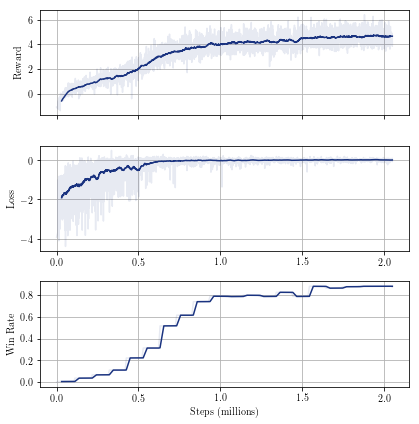

In [11]:
# Plot rewards and winrate
PG_adjust_axis = 1000000
PG_smoothing = 100
PG_color = [0.1, 0.2, 0.5]

PG_steps = []
PG_reward = []
PG_loss = []
PG_winrate = []

stats = pickle.load(open("Policy-Gradients/stats.p", "rb"))
for stat in stats:
    PG_steps.append(stat[1])
    PG_reward.append(stat[2]/1.5)
    PG_loss.append(stat[3])
    PG_winrate.append(stat[4])
PG_steps = pd.Series(PG_steps)/PG_adjust_axis
PG_reward_smooth = smooth(PG_reward,PG_smoothing)
PG_loss_smooth = smooth(PG_loss,PG_smoothing)
PG_winrate_smooth = smooth(PG_winrate,PG_smoothing)

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(311)
plt.plot(PG_steps, PG_reward_smooth, color=PG_color+[1.0])
plt.plot(PG_steps, PG_reward, color=PG_color+[0.1], label='_nolegend_')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Reward')
plt.grid()

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(PG_steps, PG_loss_smooth, color=PG_color+[1.0])
plt.plot(PG_steps, PG_loss, color=PG_color+[0.1], label='_nolegend_')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Loss')
plt.grid()

ax3 = plt.subplot(313, sharex=ax2)
plt.plot(PG_steps, PG_winrate_smooth, color=PG_color+[1.0])
plt.plot(PG_steps, PG_winrate, color=PG_color+[0.1], label='_nolegend_')
plt.xlabel('Steps (millions)')
plt.ylabel('Win Rate')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join('Policy-Gradients/policy-res.pdf'))
plt.show()

### Q-Learning

#### Q-Learning no Discount

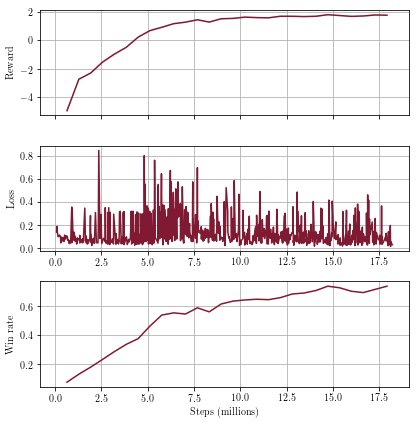

In [12]:
# Plot rewards and winrate
QL_batch_size = 32
QL_adjust_axis = 1000000
QL_smoothing = 1
QL_color = [0.5,0.1,0.2]

QL_reward_pd = pd.read_csv("Q-Learning/evaluation_total_reward_net2_d_0.csv")
QL_reward_num_pd = pd.read_csv("Q-Learning/evaluation_num_rewards_net2_d_0.csv")
QL_reward_pd['Value'] = QL_reward_pd['Value']/QL_reward_num_pd['Value'] # Scale with the number of rewards

QL_reward_smooth_q = smooth(QL_reward_pd['Value'],QL_smoothing)
QL_steps_reward_q = QL_reward_pd['Step']*QL_batch_size/QL_adjust_axis
QL_reward_q = QL_reward_pd['Value']

QL_loss_pd = pd.read_csv("Q-Learning/train_loss_net2_d_0.csv")
QL_steps_loss = QL_loss_pd['Step']*QL_batch_size/QL_adjust_axis
QL_loss_smooth_q = smooth(QL_loss_pd['Value'],QL_smoothing)
QL_loss_q = QL_loss_pd['Value']

QL_loss_smooth_q = QL_loss_smooth_q[1:840]
QL_loss_q = QL_loss_q[1:840]
QL_steps_loss_q = QL_steps_loss[1:840]

QL_winrate_pd = pd.read_csv("Q-Learning/evaluation_win_rate_net2_d_0.csv")
QL_steps_q = QL_winrate_pd['Step']*QL_batch_size/QL_adjust_axis
QL_winrate_q = QL_winrate_pd['Value']/100

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(311)
plt.plot(QL_steps_reward_q, QL_reward_smooth_q, color=QL_color+[1.0])
plt.plot(QL_steps_reward_q, QL_reward_q, color=QL_color+[0.1], label='_nolegend_')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Reward')
plt.grid()
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(QL_steps_loss_q, QL_loss_smooth_q, color=QL_color+[1.0])
plt.plot(QL_steps_loss_q, QL_loss_q, color=QL_color+[0.1], label='_nolegend_')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Loss')
plt.grid()
ax3 = plt.subplot(313, sharex=ax1)
plt.plot(QL_steps_q, QL_winrate_q, color=QL_color+[1.0])
plt.ylabel('Win rate')
plt.xlabel('Steps (millions)')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join('Q-Learning/Q-Learning-res_net2_d_0.pdf'))
plt.show()

#### Q-Learning Discount = 0.99

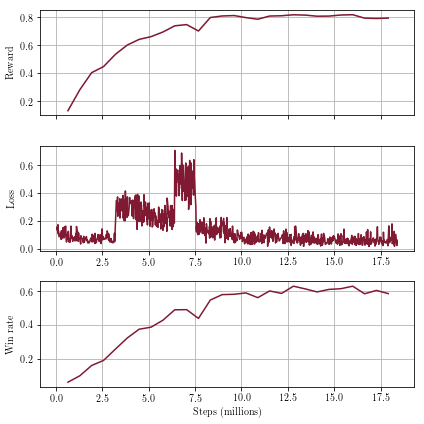

In [13]:
# Plot rewards and winrate
QL_batch_size = 32
QL_adjust_axis = 1000000
QL_smoothing = 1
QL_color = [0.5,0.1,0.2]

QL_reward_pd = pd.read_csv("Q-Learning/evaluation_total_reward_net2_d_0_99.csv")
QL_reward_num_pd = pd.read_csv("Q-Learning/evaluation_num_rewards_net2_d_0_99.csv")
QL_reward_pd['Value'] = QL_reward_pd['Value']/QL_reward_num_pd['Value'] # Scale with the number of rewards

QL_reward_smooth = smooth(QL_reward_pd['Value'],QL_smoothing)
QL_steps_reward = QL_reward_pd['Step']*QL_batch_size/QL_adjust_axis
QL_reward = QL_reward_pd['Value']

QL_loss_pd = pd.read_csv("Q-Learning/train_loss_net2_d_0_99.csv")
QL_steps_loss = QL_loss_pd['Step']*QL_batch_size/QL_adjust_axis
QL_loss_smooth = smooth(QL_loss_pd['Value'],QL_smoothing)
QL_loss = QL_loss_pd['Value']

QL_winrate_pd = pd.read_csv("Q-Learning/evaluation_win_rate_net2_d_0_99.csv")
QL_steps = QL_winrate_pd['Step']*QL_batch_size/QL_adjust_axis
QL_winrate = QL_winrate_pd['Value']/100

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(311)
plt.plot(QL_steps_reward, QL_reward_smooth, color=QL_color+[1.0])
plt.plot(QL_steps_reward, QL_reward, color=QL_color+[0.1], label='_nolegend_')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Reward')
plt.grid()

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(QL_steps_loss, QL_loss_smooth, color=QL_color+[1.0])
plt.plot(QL_steps_loss, QL_loss, color=QL_color+[0.1], label='_nolegend_')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Loss')
plt.grid()

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(QL_steps, QL_winrate, color=QL_color+[1.0])
plt.ylabel('Win rate')
plt.xlabel('Steps (millions)')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join('Q-Learning/Q-Learning-res_net2_d_0_99.pdf'))
plt.show()

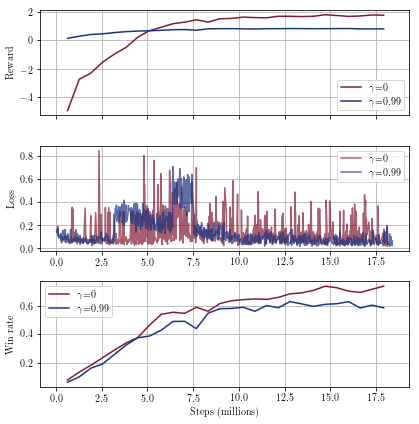

In [14]:

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(311)
plt.plot(QL_steps_reward_q, QL_reward_q, color=QL_color+[1.0])
plt.plot(QL_steps_reward, QL_reward, color=PG_color+[1.0])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(['$\gamma$=0','$\gamma$=0.99'])
plt.ylabel('Reward')
plt.grid()

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(QL_steps_loss_q, QL_loss_q, color=QL_color+[0.7])
plt.plot(QL_steps_loss, QL_loss, color=PG_color+[0.7])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Loss')
plt.legend(['$\gamma$=0','$\gamma$=0.99'])
plt.grid()

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(QL_steps_q, QL_winrate_q, color=QL_color+[1.0])
plt.plot(QL_steps, QL_winrate, color=PG_color+[1.0])
plt.ylabel('Win rate')
plt.legend(['$\gamma$=0','$\gamma$=0.99'])
plt.xlabel('Steps (millions)')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join('Q-Learning/Q-Learning-res_net2_compare.pdf'))
plt.show()

### Evolutionary Strategies

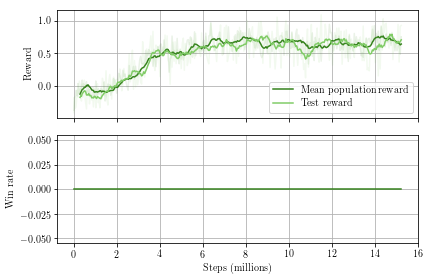

In [15]:
# Plot rewards and winrate
ES_adjust_axis = 1000000
ES_smoothing = 10
ES_color = [0.2,0.5,0.1]
ES_color_test = [0.5,0.8,0.4]

with open(os.path.join('Evolutionary/results.pkl'), 'rb') as f:
    ES_results = pickle.load(f)
ES_steps = pd.Series(ES_results['steps'])/ES_adjust_axis
ES_rewards_mean = ES_results['mean_pop_rewards']
ES_rewards_mean_smooth = smooth(ES_rewards_mean,ES_smoothing)
ES_rewards_test = ES_results['test_rewards']
ES_rewards_test_smooth = smooth(ES_rewards_test,ES_smoothing)
ES_winrate = ES_results['win_rate']

fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot(211)
plt.plot(ES_steps, ES_rewards_mean_smooth, color=ES_color+[1.0])
plt.plot(ES_steps, ES_rewards_mean, color=ES_color+[0.1], label='_nolegend_')
plt.plot(ES_steps, ES_rewards_test_smooth, color=ES_color_test+[1.0])
plt.plot(ES_steps, ES_rewards_test, color=ES_color_test+[0.1], label='_nolegend_')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Reward')
plt.legend(['Mean population reward', 'Test reward'])
plt.grid()
plt.subplot(212, sharex=ax1)
plt.plot(ES_steps, ES_winrate, color=ES_color+[1.0])
plt.xlabel('Steps (millions)')
plt.ylabel('Win rate')
plt.tight_layout()
plt.grid()
plt.savefig(os.path.join('Evolutionary/evo-res.pdf'))
plt.show()

### Comparison

In [16]:
# Plot winrate in a single plot for comparison

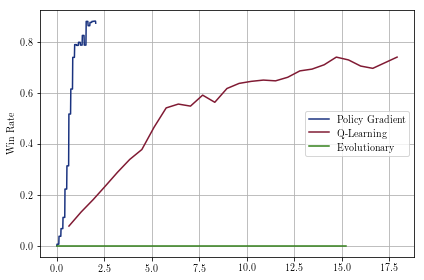

In [17]:
fig = plt.figure(figsize=(6, 4))
plt.plot(PG_steps, PG_winrate, color=PG_color+[1.0])
plt.plot(QL_steps_q, QL_winrate_q, color=QL_color+[1.0])
plt.plot(ES_steps, ES_winrate, color=ES_color+[1.0])
plt.ylabel('Win Rate')
plt.legend(['Policy Gradient','Q-Learning','Evolutionary'])
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join('compare-res.pdf'))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
plt.plot(range(1,13), [96.15, 98.46, 99.48, 98.60, 95.68, 89.89, 79.64, 64.83, 
         48.92, 35.42, 22.39, 14.46])

plt.legend(['Policy Gradient'])
plt.title('Win rate vs Number of Bombs on 6x6 Minesweeper Board')
plt.ylabel('Win Rate')
plt.xlabel('Number of Bombs')
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
# Q-learning best model on 6x6 with 6 mines
fig = plt.figure(figsize=(6,4))
plt.plot(range(1,13), [81.49, 60.25, 69.71, 86.88, 92.68, 90.20, 76.60, 52.69, 
         25.63, 9.20, 2.90, 0.91])

plt.legend(['Q-Learning'])
plt.title('Win rate vs Number of Bombs on 6x6 Minesweeper Board')
plt.ylabel('Win Rate')
plt.xlabel('Number of Bombs')
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
# Q-learning best model on 6x6 with different number of mines (trained for 1 day with random number of mines
fig = plt.figure(figsize=(6,4))
plt.plot(range(1,13), [100, 100, 98.91, 96.14, 88.62, 75.48, 59.42, 43.13, 28.16, 18.35, 11.42, 6.57])

plt.legend(['Q-Learning'])
plt.title('Win rate vs Number of Bombs on 6x6 Minesweeper Board')
plt.ylabel('Win Rate')
plt.xlabel('Number of Bombs')
plt.tight_layout()
plt.grid()
plt.show()